# **The Sparks Foundation**
# Data Science & Business Analytics Internship
## **Task 1: Prediction using Supervised Machine Learning**
### **By Shubham Durgude**

### **Overview:**

### **In this Task, the goal is to utilize the Linear Regression supervised machine learning algorithm to forecast a student's percentage based on the number of hours they have studied.**

### **Question to be answered:**

### **What will be predicted score if a student studies for 9.25 hrs/day?**

### **Step 1-Importing necessary Libraries and Loading Data:**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#Reading the dataset from the given link
data_link = 'http://bit.ly/w-data'
data = pd.read_csv(data_link)

In [25]:
print("Displayed First Few Records:")
data.head(5)

Displayed First Few Records:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [26]:
print("Displayed Last Few Records:")
data.tail(5)

Displayed Last Few Records:


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [29]:
print("Number of Rows & Columns in Dataset:\n", data.shape)

Number of Rows & Columns in Dataset:
 (25, 2)


### **Step 2-Visualizing The Dataset**

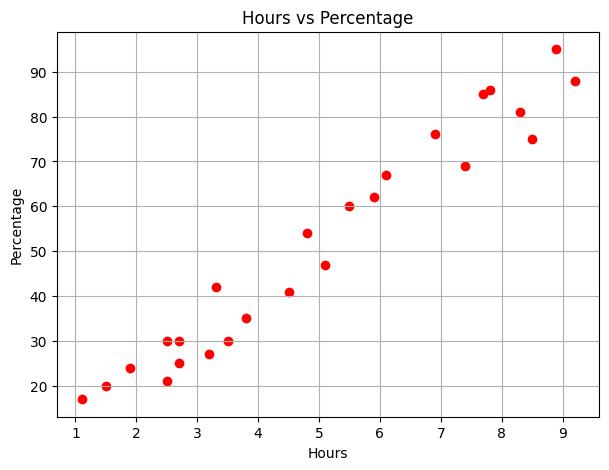

In [34]:
# Visualize the distribution of scores using a scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(data['Hours'], data['Scores'], color='red', marker='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

### **Step 3-Data Preparation and Splitting**

In [36]:
# Import sklearn Model for train_test_split
from sklearn.model_selection import train_test_split

# Extracting independent variable (X) and dependent variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Splitting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Step 4-Training the Linear Regression Model**

In [40]:
# For Training Import Linear Regression Model
from sklearn.linear_model import LinearRegression

# Training Linear Regression model:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training completed!")

Training completed!


### **Step 5-Making Predictions**

In [41]:
# Making predictions
hours = 9.25
predicted_score = regressor.predict([[hours]])

# Display Predicted score for a student who studies 9.25 hours/day
print("Predicted score for a Student who studying 9.25 hours/day:", predicted_score[0])

Predicted score for a Student who studying 9.25 hours/day: 93.69173248737539


### **Step 6-Evaluating Model Metrics**

In [42]:
#for checking the performance of import metrics model
from sklearn import metrics

# Making predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluating model metrics
mea = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

# Displaying the metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
R-squared: 0.9454906892105354


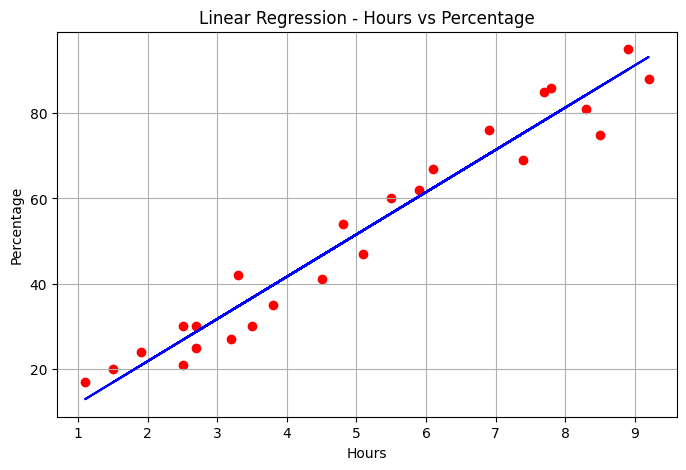

In [46]:
# Visualizing the regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', marker='o')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Linear Regression - Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

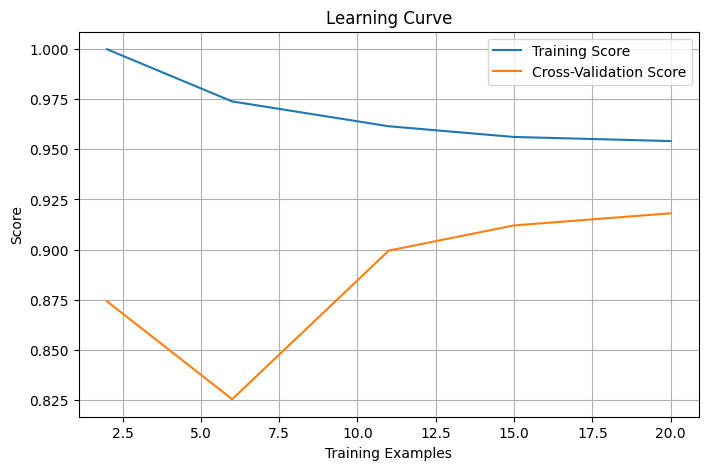

In [45]:
from sklearn.model_selection import learning_curve

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=5)
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
